# 1.Second order optimization methods



In [13]:
import numpy as np

**1.1 Newton's method**

Implementation 1. 1 : 1 Implement Newton’s method in its basic form (2). Your code should take f, ∇f and
∇2f as inputs.

In [14]:
def newtons_iteration(wk, f, df, d2f):
  wk1 = wk - np.dot(np.linalg.inv(d2f(wk) ), df(wk))
  return wk1

def newton(f, df, d2f, w0):
  nb_it = 0
  wk = w0
  function_values = []
  while np.linalg.norm(df(wk)) >= 1e-6:
    function_values.append(f(wk))
    wk1 = newtons_iteration(wk, f, df, d2f)
    wk = wk1
    nb_it += 1

  print(f"Newton's method finished after {nb_it} iterations.")
  return wk,function_values,nb_it


Question 1.1
a) Write down the first iteration of Newton’s method for problem (3), and show that Newton’s method indeed
converges in one iteration to the solution.


 $\ \min q(w) = 2(w_1 + w_2 + w_3 - 3)^2 + (w_1 - w_2)^2 + (w_2 - w_3)^2 $

   
 $  \nabla q(w) =
   \begin{pmatrix}
         4(w_1 + w_2 + w_3 - 3) + 2(w_1 - w_2) \\
         4(w_1 + w_2 + w_3 - 3) - 2(w_1 - w_2) + 2(w_2 - w_3) \\
         4(w_1 + w_2 + w_3 - 3) - 2(w_2 - w_3)
   \end{pmatrix}  $
   
 $  \nabla ^2 q(w) =
   \begin{pmatrix}
         6&2&4\\ 2&8&2 \\ 4&2&6
   \end{pmatrix}  $

Since q(w) is $C^1$ ,we have that $\nabla q(w^*) = 0$

Furthermore, we notice that $\nabla q(w) = \nabla^2 q(w) \cdot w - \begin{pmatrix} 12\\ 12 \\ 12 \end{pmatrix}$

We thus have:

$\nabla q(w^*) = 0 = \nabla ^2 q(w^*)   w^* - \begin{pmatrix}
         12\\ 12 \\ 12
   \end{pmatrix}$  

By solving the equation:
$w^* = [\nabla ^2 (q(w^*)]^{-1} * \begin{pmatrix}
         12\\ 12 \\ 12
   \end{pmatrix}$


Let A = $\nabla^2 q(w)$ for simplicity

We thus have for the first iteration:

$w_1 = w_0 - \nabla^2 q(w_0)^{-1} \cdot \nabla q(w_0)$

$w_1 = w_0 - \nabla^2 q(w_0)^{-1} \cdot [\nabla^2 q(w_0) \cdot w_0 - \begin{pmatrix} 12\\ 12 \\ 12 \end{pmatrix}]$

$w_1 = w_0 - w_0 + w^*$


$w_1 =  w^*$

Newton's method converges in one iteration to the solution $w^*$.

In [15]:
def q(w):
  return (2*(w[0] + w[1] + w[2] - 3)**2 +(w[0] - w[1])**2 +(w[1] - w[2])**2)

def dq(w):
    dq = np.array([4*(w[0] + w[1] + w[2] - 3) + 2*(w[0] - w[1]),
              4*(w[0] + w[1] + w[2] - 3) - 2*(w[0] - w[1]) + 2*(w[1] - w[2]),
              4*(w[0] + w[1] + w[2] - 3) - 2*(w[1] - w[2])])
    return dq

def ddq(w):
  ddq = np.array([[6, 2, 4],
                    [2, 8, 2],
                    [4, 2, 6]], dtype=float)
  return ddq

b) Run the method starting from the origin and two other starting points of your choice. Do you indeed
observe convergence in one iteration?

In [16]:
points = [np.array([0, 0, 0]), np.array([1, 2, 6]), np.array([-1, 5, -2])]

for i, x0 in enumerate(points):
    result,functions_eval,nb_it = newton(q, dq, ddq, x0)
    print(f"Starting point {i+1}: {x0}")
    print("Optimized solution:", result)
    print()

Newton's method finished after 1 iterations.
Starting point 1: [0 0 0]
Optimized solution: [1. 1. 1.]

Newton's method finished after 1 iterations.
Starting point 2: [1 2 6]
Optimized solution: [1. 1. 1.]

Newton's method finished after 1 iterations.
Starting point 3: [-1  5 -2]
Optimized solution: [1. 1. 1.]



In [17]:
import numpy as np

def rosenbrock(w):
    return 100 * (w[1] - w[0]**2)**2 + (1 - w[0])**2

def rosenbrock_gradient(w):
    df_dw0 = -400 * w[0] * (w[1] - w[0]**2) - 2 * (1 - w[0])
    df_dw1 = 200 * (w[1] - w[0]**2)
    return np.array([df_dw0, df_dw1])

def rosenbrock_hessian(w):
    d2f_dw0dw0 = 1200 * w[0]**2 - 400 * w[1] + 2
    d2f_dw0dw1 = -400 * w[0]
    d2f_dw1dw0 = -400 * w[0]
    d2f_dw1dw1 = 200
    return np.array([[d2f_dw0dw0, d2f_dw0dw1],
                      [d2f_dw1dw0, d2f_dw1dw1]],dtype=float)

In [18]:
w0_1 = np.array([-1.2, 1])
w_star,function_values_newton,iterations_newton= newton(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, w0_1)
print("Starting point w01:", w0_1)
print("Optimized solution:", w_star)
print('')
w0_2 = np.array( [0, 1/200 + 10 ** - 12 ])
print("Starting point w01:", w0_2)
try:
  w_star,functions_eval,nb_it= newton(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, w0_2)
  print("Optimized solution:", w_star)
except Exception as e:
  print('Failed due to', e)


Newton's method finished after 6 iterations.
Starting point w01: [-1.2  1. ]
Optimized solution: [1. 1.]

Starting point w01: [0.    0.005]
Failed due to Singular matrix


For the first point, the method converges to the optimal point.
For the second point, hessian matrix is not invertible, thus the method does not converge.

In [19]:
w0_3 = np.array([0, 0.005])
print("Starting point w01:", w0_3)
try:
  w_star,functions_eval,nb_it= newton(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, w0_3)
except Exception as e:
  print('Failed due to', e)

Starting point w01: [0.    0.005]
Failed due to Singular matrix


The hessian matrix is not invertible, thus the method does not converge.


**1.2 A globally convergent version of Newton’s method**

Implementation 1.2 Implement the globalized version of Newton’s method using the direction choice (5)–
(6) and the Armijo line-search procedure from Definition 1.1.

In [20]:
def newton_direction(w, lamda,f,d_f,dd_f):
    H = dd_f(w)
    H += lamda * np.eye(len(w), dtype=float)
    H_inv = np.linalg.inv(H)
    gradient = d_f(w)
    direction = -np.dot(H_inv, gradient)
    return direction

def armijo_line_search(w, f, d_f ,direction, c, theta):
    alpha = 1.0
    while f(w + alpha * direction) >= f(w) + c * alpha * np.dot(d_f(w).T, direction):
        alpha *= theta
    return alpha

def global_newton(w, f, d_f, dd_f,c, theta):
    nb_iterations = 0
    function_values = []
    gradient_norm = np.linalg.norm(d_f(w))
    while gradient_norm >= 1e-6:
        lamda_min = np.min(np.linalg.eigvalsh(dd_f(w)))
        lamda = float(2 * max(-lamda_min, 1e-10))
        d = newton_direction(w, lamda, f, d_f, dd_f)
        s = armijo_line_search(w, f, d_f, d,c, theta)
        function_values.append(f(w))
        w_n = w + s* d
        nb_iterations += 1
        gradient_norm = np.linalg.norm(d_f(w_n))
        w = w_n
    return w, nb_iterations,function_values

Question 3 Apply Newton’s method with line search to the problem (4) using c = 0.0001, θ = 0.5, and the
two initial points mentioned in Question 2. Compare your results with those obtained for the basic Newton
iteration.

In [21]:
w01 = np.array([-1.2, 1])
w1_global,iterations_global,function_values_global = global_newton(w01, rosenbrock, rosenbrock_gradient, rosenbrock_hessian,0.0001,0.5)
print("Starting point w01:", w01)
print("Globalized Newton's method result (w1):", w1_global)
print("Function value at w1:", rosenbrock(w1_global))
print("The number of iterations is", iterations_global)

w02 = np.array([0, 1/200 + 1e-12])
w2_global,nb_iterations,function_values = global_newton(w02, rosenbrock, rosenbrock_gradient, rosenbrock_hessian,0.0001,0.5)
print("Starting point w02:", w02)
print("Globalized Newton's method result (w2):", w2_global)
print("Function value at w2:", rosenbrock(w2_global))
print("The number of iterations is :", nb_iterations)

Starting point w01: [-1.2  1. ]
Globalized Newton's method result (w1): [1. 1.]
Function value at w1: 3.744068798774673e-21
The number of iterations is 21
Starting point w02: [0.    0.005]
Globalized Newton's method result (w2): [1. 1.]
Function value at w2: 5.0613130789705456e-26
The number of iterations is : 14


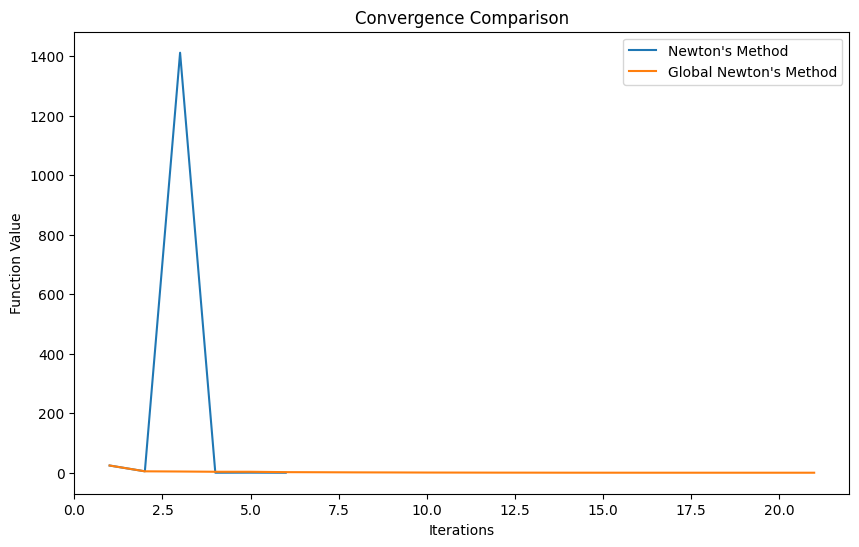

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
iterations_range_newton = list(range(1, iterations_newton + 1))
iterations_range_global = list(range(1, iterations_global+ 1))
plt.plot(iterations_range_newton, function_values_newton, label="Newton's Method")
plt.plot(iterations_range_global, function_values_global, label="Global Newton's Method")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.legend()
plt.title("Convergence Comparison")
plt.show()

To compare with Newton's method, for the first point, the globalized version takes more iterations than Newton's version to converge toward the optimal point (21 vs 6) even though it gets closer from it at first. Concerning the second point, the globalized method allows us to achieve a convergence that we could not achieve before with Newton.

Question 4 Try out a few values for c and θ (report the results of your tests). How sensitive does the method
appear to be to these values?

Testing with theta = 0.1
	Testing with c = 0.001
		Iterations: 47
	Testing with c = 0.10088888888888889
		Iterations: 49
	Testing with c = 0.20077777777777778
		Iterations: 53
	Testing with c = 0.30066666666666664
		Iterations: 69
	Testing with c = 0.40055555555555555
		Iterations: 74
	Testing with c = 0.5004444444444445
		Iterations: 150
	Testing with c = 0.6003333333333333
		Iterations: 223
	Testing with c = 0.7002222222222222
		Iterations: 233
	Testing with c = 0.8001111111111111
		Iterations: 233
	Testing with c = 0.9
		Iterations: 233
Testing with theta = 0.2
	Testing with c = 0.001
		Iterations: 23
	Testing with c = 0.10088888888888889
		Iterations: 23
	Testing with c = 0.20077777777777778
		Iterations: 29
	Testing with c = 0.30066666666666664
		Iterations: 34
	Testing with c = 0.40055555555555555
		Iterations: 42
	Testing with c = 0.5004444444444445
		Iterations: 71
	Testing with c = 0.6003333333333333
		Iterations: 118
	Testing with c = 0.7002222222222222
		Iterations: 122
	Tes

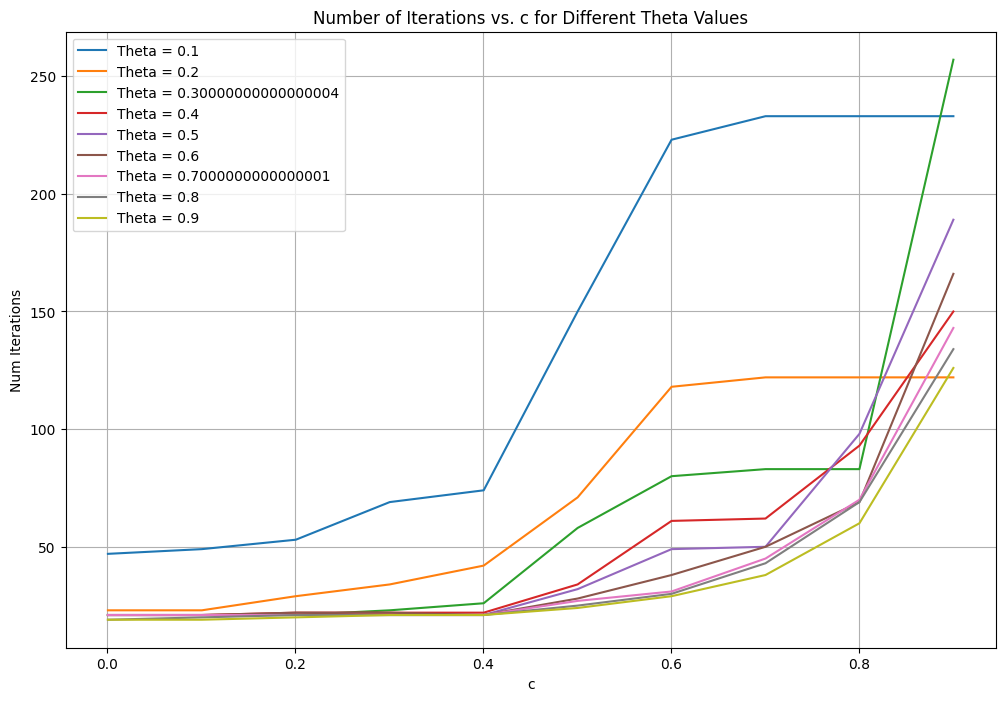

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

c_values = np.linspace(0.001, 0.9, 10)
theta_values = np.linspace(0.1, 0.9, 9)
results = pd.DataFrame(columns=theta_values, index=c_values)
total_perfs = []
for t in theta_values:
    print(f'Testing with theta = {t}')
    perf_specific_theta = []
    for x in c_values:
        print(f'\tTesting with c = {x}')
        w_optimized, iterations,functions_eval = global_newton(w01, rosenbrock, rosenbrock_gradient, rosenbrock_hessian, c=x, theta=t)
        print(f'\t\tIterations: {iterations}')
        results.loc[x, t] = iterations
        perf_specific_theta.append(iterations)
    total_perfs.append(perf_specific_theta)

fig, ax = plt.subplots(figsize=(12, 8))
for idx, perf in enumerate(total_perfs):
    ax.plot(c_values, perf, label=f'Theta = {theta_values[idx]}')
ax.set_xlabel('c')
ax.set_ylabel('Num Iterations')
ax.set_title('Number of Iterations vs. c for Different Theta Values')
ax.legend()
ax.grid(True)
plt.show()

The method is sensitive to the values of
c and theta.Small values for c tend to increase the number of iterations, while larger values may lead to faster convergence. Concerning theta, small values of theta may result in slower convergence, whereas larger values can potentially accelerate it.From our tests, the lowest number of iterations is 19 when testing with theta = 0.9 and c=0.001 for example.

**1.3 Quasi-Newton methods and BFGS**

Implementation 1.3 Implement a quasi-Newton method with the BFGS update (9) and Armijo line search (7).

In [24]:
def bfgs_quasi_newton(w0, f, gradient_f, c, theta):

    w = w0
    H = np.eye(len(w0))
    gradient_norm = np.linalg.norm(gradient_f(w))
    iter_count = 0
    function_values=[]


    while gradient_norm >= 1e-6:
        function_values.append(f(w))
        direction = -np.dot(H, gradient_f(w))
        alpha = 1.0
        while f(w + alpha * direction) >= f(w) + c * alpha * np.dot(gradient_f(w).T, direction):
            alpha *= theta


        w_n = w + alpha * direction
        gradient_new = gradient_f(w_n)
        gradient_diff = gradient_new - gradient_f(w)
        s = w_n - w
        y = gradient_new - gradient_f(w)
        rho = 1 / np.dot(y.T, s)

        if rho > 0:
            H = np.dot((np.eye(len(w)) - rho * np.outer(s, y)), np.dot(H, np.eye(len(w)) - rho * np.outer(y, s))) + rho * np.outer(s, s)

        w = w_n
        iter_count += 1
        gradient_norm = np.linalg.norm(gradient_new)
    return w, iter_count,function_values

Question 5 Compare the quasi-Newton method from Implementation 1.3 and the line-search Newton method
from Implementation 1.1 on problems (3) and (4). Use the same starting points and the same values for c
and θ in the comparison. Illustrate the comparison in terms of
• Iterations;
• Gradient and Hessian evaluations, assuming the cost of a Hessian matrix is d times that of a gradient
vector;
• Function evaluations.

In [25]:
# Method but with added metrics for evaluations
def bfgs_quasi_newton_comp(w0, f, gradient_f, hessian_f, c, theta):
    w = w0
    H = np.eye(len(w0))
    gradient_norm = np.linalg.norm(gradient_f(w))
    iter_count = 0
    gradient_evaluations = 1
    hessian_evaluations = 0
    function_evaluations = 0
    function_values=[]
    while gradient_norm >= 1e-6:
        function_values.append(f(w))
        direction = -np.dot(H, gradient_f(w))
        gradient_evaluations += 1
        alpha = 1.0
        while f(w + alpha * direction) >= f(w) + c * alpha * np.dot(gradient_f(w).T, direction):
            alpha *= theta
            function_evaluations += 2
            gradient_evaluations += 1

        w_n = w + alpha * direction

        gradient_new = gradient_f(w_n)
        gradient_diff = gradient_new - gradient_f(w)
        gradient_evaluations += 2

        hessian_new = hessian_f(w_n)
        hessian_evaluations += 1

        s = w_n - w
        y = gradient_new - gradient_f(w)
        gradient_evaluations += 1
        rho = 1 / np.dot(y.T, s)
        if rho > 0:
          H = np.dot((np.eye(len(w)) - rho * np.outer(s, y)), np.dot(H, np.eye(len(w)) - rho * np.outer(y, s))) + rho * np.outer(s, s)

        w = w_n
        gradient_norm = np.linalg.norm(gradient_new)
        iter_count += 1

    return w, iter_count, gradient_evaluations, hessian_evaluations, function_evaluations,function_values


def global_newton_comp(w, f, d_f, dd_f, c, theta):
    lamda_min = np.min(np.linalg.eigvalsh(dd_f(w)))
    lamda = float(2 * max(-lamda_min, 1e-10))
    nb_iterations = 0
    gradient_evaluations = 0
    hessian_evaluations = 1
    function_evaluations = 0
    gradient_norm = np.linalg.norm(d_f(w))
    gradient_evaluations += 1
    function_values=[]
    while gradient_norm >= 1e-6:
        function_values.append(f(w))
        direction = newton_direction(w, lamda, f, d_f, dd_f)
        gradient_evaluations += 1
        hessian_evaluations += 1

        step_size = armijo_line_search(w, f, d_f, direction, c, theta)
        gradient_evaluations += 1
        function_evaluations += 2
        w_new = w + step_size * direction

        gradient_norm = np.linalg.norm(d_f(w_new))
        gradient_evaluations += 1
        nb_iterations += 1
        w = w_new

    return w, nb_iterations, gradient_evaluations, hessian_evaluations, function_evaluations,function_values

In [26]:
c = 0.0001
theta = 0.5

w01 = np.array([-1.2, 1,0])
w_opt_newton_3, iter_newton_3, gradient_evals_newton_3, hessian_evals_newton_3, func_evals_newton_3,function_values = global_newton_comp(w01, q, dq, ddq, c, theta)
w_opt_bfgs_3, iter_bfgs_3, gradient_evals_bfgs_3, hessian_evals_bfgs_3, func_evals_bfgs_3,function_values = bfgs_quasi_newton_comp(w01, q, dq, ddq,c, theta)

print("Results for Problem 3:")
print("LINE SEARCH NEWTON METHOD:")
print("Optimal solution:", w_opt_newton_3)
print("Number of iterations:", iter_newton_3)
print("Gradient evaluations:", gradient_evals_newton_3)
print("Hessian evaluations:", hessian_evals_newton_3)
print("Function evaluations:", func_evals_newton_3)
print("QUASI NEWTON WITH BFGS UPDATE:")
print("Optimal solution:", w_opt_bfgs_3)
print("Number of iterations:", iter_bfgs_3)
print("Gradient evaluations:", gradient_evals_bfgs_3)
print("Hessian evaluations:", hessian_evals_bfgs_3)
print("Function evaluations:", func_evals_bfgs_3)

w02 = np.array([-1.2, 1])
w_opt_newton_4, iter_newton_4, gradient_evals_newton_4, hessian_evals_newton_4, func_evals_newton_4,function_values = global_newton_comp(w02, rosenbrock, rosenbrock_gradient, rosenbrock_hessian,c,theta)
w_opt_bfgs_4, iter_bfgs_4, gradient_evals_bfgs_4, hessian_evals_bfgs_4, func_evals_bfgs_4,function_values = bfgs_quasi_newton_comp(w02, rosenbrock, rosenbrock_gradient, rosenbrock_hessian,c,theta)
print("\n\nResults for Problem 4:")
print("LINE SEARCH NEWTON METHOD:")
print("Optimal solution:", w_opt_newton_4)
print("Number of iterations:", iter_newton_4)
print("Gradient evaluations:", gradient_evals_newton_4)
print("Hessian evaluations:", hessian_evals_newton_4)
print("Function evaluations:", func_evals_newton_4)
print("QUASI NEWTON WITH BFGS UPDATE:")
print("Optimal solution:", w_opt_bfgs_4)
print("Number of iterations:", iter_bfgs_4)
print("Gradient evaluations:", gradient_evals_bfgs_4)
print("Hessian evaluations:", hessian_evals_bfgs_4)
print("Function evaluations:", func_evals_bfgs_4)


Results for Problem 3:
LINE SEARCH NEWTON METHOD:
Optimal solution: [1. 1. 1.]
Number of iterations: 1
Gradient evaluations: 4
Hessian evaluations: 2
Function evaluations: 2
QUASI NEWTON WITH BFGS UPDATE:
Optimal solution: [0.99999999 1.         1.        ]
Number of iterations: 9
Gradient evaluations: 42
Hessian evaluations: 9
Function evaluations: 10


Results for Problem 4:
LINE SEARCH NEWTON METHOD:
Optimal solution: [1. 1.]
Number of iterations: 21
Gradient evaluations: 64
Hessian evaluations: 22
Function evaluations: 42
QUASI NEWTON WITH BFGS UPDATE:
Optimal solution: [1.         0.99999999]
Number of iterations: 34
Gradient evaluations: 156
Hessian evaluations: 34
Function evaluations: 38


For Problem 3, the line search Newton method converges faster with fewer iterations and gradient and hessian evaluations compared to the quasi-Newton method with BFGS update. For Problem 4, we see exactly the same behaviour. Line search method seems to be more efficient.
It is possible to reduce the number of evaluations by stocking the variable for a certain point instead of reevaluating the functions for the same point. It is possible to make the code more efficient.

**1.4 Limited-memory BFGS**

Implementation 1.4 Implement a quasi-Newton method with the L-BFGS update described by Algorithm 1
and Armijo line search (7).

In [27]:
def lbfgs_quasi_newton(w0,f, grad_f,  c, theta, m=5, max_iter=100000):
    w = w0
    H = np.eye(len(w0))
    grad_evals = 0
    func_evals = 1
    iterations = 0
    s_hist = []
    y_hist = []
    function_values=[]
    for _ in range(max_iter):
        function_values.append(f(w))
        grad = grad_f(w)
        grad_evals += 1
        direction = -np.dot(H, grad)
        step_size = armijo_line_search(w, f, grad_f, direction, c, theta)
        grad_evals += 1
        func_evals += 2
        w_new = w + step_size * direction
        iterations += 1

        s = step_size * direction
        y = grad_f(w_new) - grad
        grad_evals += 1
        s_hist.append(s)
        y_hist.append(y)

        if len(s_hist) > m:
            s_hist.pop(0)
            y_hist.pop(0)

        q = grad
        alpha = np.zeros(len(s_hist))
        for i in range(len(s_hist) - 1, -1, -1):
            alpha[i] = np.dot(s_hist[i], q) / np.dot(y_hist[i], s_hist[i])
            q -= alpha[i] * y_hist[i]
        r = np.dot(H, q)
        for i in range(len(s_hist)):
            beta = np.dot(y_hist[i], r) / np.dot(y_hist[i], s_hist[i])
            r += (alpha[i] - beta) * s_hist[i]
        direction = -r
        for i in range(len(s_hist)):
            ro = 1 / np.dot(y_hist[i], s_hist[i])
            A = np.eye(len(s_hist[i])) - ro * np.outer(s_hist[i], y_hist[i])
            B = np.eye(len(s_hist[i])) - ro * np.outer(y_hist[i], s_hist[i])
            H = np.dot(A, np.dot(H, B)) + ro * np.outer(s_hist[i], s_hist[i])
        if np.linalg.norm(w_new - w) < 1e-6:
            break
        w = w_new
    return w, grad_evals, func_evals, iterations,function_values

Question 6 Run BFGS and three variants of L-BFGS respectively using m = 0, m = 1 and m = 5 on the
Rosenbrock function (4), and compare the results. What metric could show the computational interest of
limited memory quasi-Newton? Do you observe this improvement here?

In [28]:
w0 = np.array([0.0,0.0])
c = 0.0001
theta = 0.5


w_opt, iter,func_val= bfgs_quasi_newton(w0, rosenbrock, rosenbrock_gradient,c,theta)
func_evals = iter + 1

w_lbfgs_m0, grad_evals_lbfgs_m0, func_evals_lbfgs_m0, iterations_lbfgs_m0,function_values_0= lbfgs_quasi_newton(w0,rosenbrock, rosenbrock_gradient,  c, theta, m=0)
w_lbfgs_m1, grad_evals_lbfgs_m1, func_evals_lbfgs_m1, iterations_lbfgs_m1,function_values_1 = lbfgs_quasi_newton(w0,rosenbrock, rosenbrock_gradient,  c, theta, m=1)
w_lbfgs_m5, grad_evals_lbfgs_m5, func_evals_lbfgs_m5, iterations_lbfgs_m5,function_values_5 = lbfgs_quasi_newton(w0,rosenbrock, rosenbrock_gradient,  c, theta, m=5)

print("Results for BFGS :")
print("Optimal solution reached :", w_opt)
print("Number of iterations:", iter)
print("Function evaluations:", func_evals)

print("\nResults for L-BFGS (m=0):")
print("Optimal solution reached:", w_lbfgs_m0)
print("Number of iterations:", iterations_lbfgs_m0)
print("Function evaluations:", func_evals_lbfgs_m0)

print("\nResults for L-BFGS with m=1:")
print("Optimal solution reached:", w_lbfgs_m1)
print("Number of iterations:", iterations_lbfgs_m1)
print("Function evaluations:", func_evals_lbfgs_m1)

print("\nResults for L-BFGS with m=5:")
print("Optimal solution reached:", w_lbfgs_m5)
print("Number of iterations:", iterations_lbfgs_m5)
print("Function evaluations:", func_evals_lbfgs_m5)

Results for BFGS :
Optimal solution reached : [1. 1.]
Number of iterations: 26
Function evaluations: 27

Results for L-BFGS (m=0):
Optimal solution reached: [0.99960461 0.99920862]
Number of iterations: 7147
Function evaluations: 14295

Results for L-BFGS with m=1:
Optimal solution reached: [1.00000003 1.00000004]
Number of iterations: 26
Function evaluations: 53

Results for L-BFGS with m=5:
Optimal solution reached: [1.         0.99999999]
Number of iterations: 25
Function evaluations: 51


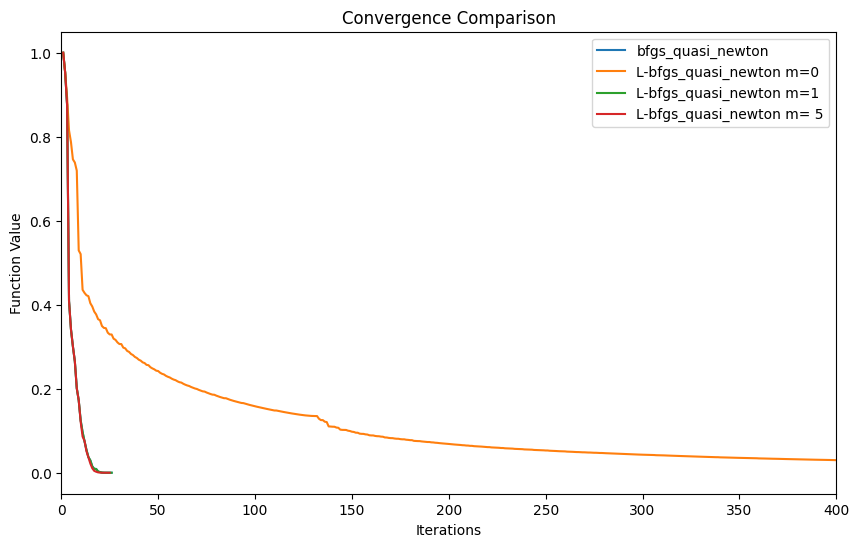

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))


it = list(range(1, iter + 1))
it_m0 = list(range(1, iterations_lbfgs_m0 +1))
it_m1 = list(range(1, iterations_lbfgs_m1 + 1))
it_m5 = list(range(1, iterations_lbfgs_m5+ 1))
plt.plot(it, func_val, label="bfgs_quasi_newton")
plt.plot(it_m0, function_values_0, label="L-bfgs_quasi_newton m=0")
plt.plot(it_m1, function_values_1, label="L-bfgs_quasi_newton m=1")
plt.plot(it_m5, function_values_5, label="L-bfgs_quasi_newton m= 5")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.legend()
plt.title("Convergence Comparison")
plt.xlim(0, 400)
plt.show()

We realize that when m is too small (m=0), the approximation of the Hessian and therefore affects the performance of the algorithm and takes much more epochs to get to the optimal solution.
However, when the m increases (here for m =5) we get closer and closer to the solution given by BFGS because increasing m allows a more precise approximation of the Hessian as with BFGS. Moreover, for this case, the algorithm converges faster in terms of iterations towards the solution.

Moreover, L-BGFS aims to approximate the Hessian matrix using limited memory, which can reduce the computational cost compared to methods using the fill Hessian. The number of iteration is improved for big values of m wich indicated fewer iterations to reach the optimal solution. It shows more efficienty due to the lower computational time.

# 2 Stochastic second-order methods


**2.1 Subsampling Newton methods**

Implementation 2.1 Implement a subsampling Newton method with the following requirements:
• The method should take |Sk| and |SH
k | as inputs (for simplicity, we only consider constant sample sizes).
• The method should be able to use two different stepsize approaches:
– Constant stepsize αk = α > 0 (provided by the user);
– Stepsize computed via the subsampling line-search technique described in Definition 2.1.

In [30]:
import numpy as np
from scipy.linalg import toeplitz

def subsampling_newton(w0, f, gradient_f, hessian_f, X, y, lam, Sk_size, SHk_size,alpha=None, s=None, theta=None, c=None,max_iterations=10000):
    w = w0
    iter_count = 0
    epoch_count = 0
    n = len(y)

    for iteration in range(max_iterations):
        Sk = np.random.choice(n, Sk_size, replace=False)
        SHk = np.random.choice(n, SHk_size, replace=False)
        gradient_sub = gradient_f(w, X, y, lam, Sk)
        hessian_sub = hessian_f(w, X, y, lam, SHk)
        d = -np.linalg.inv(hessian_sub).dot(gradient_sub)

        if alpha is None:
          alpha = subsampling_armijo_line_search(lambda w, Sk: np.mean([logistic_loss(w, X[i], y[i], lam) for i in Sk]),
                                                     lambda w, Sk: gradient_f(w, X, y, lam, Sk),w, d,c, theta, Sk)
        else:
          alpha= alpha

        w = w + alpha * d
        iter_count += 1
        if np.linalg.norm(gradient_sub) < 1e-6:
            break

    return w, iter_count

def subsampling_armijo_line_search(f, grad_f, w, p, c, theta, S_k):
    alpha = 1.0
    while f(w + alpha * p, S_k) > f(w, S_k) + c * alpha * np.dot(grad_f(w, S_k), p):
        alpha *= theta
    return alpha

Question 7 Using the same (synthetic) dataset than in lab 4 of the course (on stochastic gradient methods),
compare the subsampling Newton method with the standard Newton method with the following settings:
• Use the appropriate version of Armijo line search for each method (use the same c and θ);
• Use different sizes for |Sk| and |SH
k |, including the configuration |Sk| = |SH
k | = 1.
Use the notion of epoch for the comparison.

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt
from numpy.random import multivariate_normal, randn
from scipy.linalg import toeplitz

In [32]:
def simu_linmodel(w, n, std=1., corr=0.5):
    d = w.shape[0]
    cov = toeplitz(corr ** np.arange(0, d))
    X = multivariate_normal(np.zeros(d), cov, size=n)
    noise = std * randn(n)
    y = X.dot(w) + noise
    return X, y

In [33]:

def logistic_loss(w, x, y, lambda_reg):
    return np.log(1 + np.exp(-y * np.dot(x, w))) + (lambda_reg / 2) * np.dot(w, w)

def logistic_grad(w, x, y, lambda_reg):
    return (-y * x / (1 + np.exp(y * np.dot(x, w)))) + lambda_reg * w

def logistic_hessian(w, x, y, lambda_reg):
    p = 1 / (1 + np.exp(-y * np.dot(x, w)))
    return (p * (1 - p) * np.outer(x, x)) + lambda_reg * np.eye(len(w))

def subsampled_loss(w, X, y, lam, Sk):

    loss_sum = 0
    for i in Sk:
        xi = np.array(X[i])
        yi = np.array(y[i])
        loss_sum += logistic_loss(w, xi, yi, lam)
    return loss_sum / len(Sk)

def subsampled_gradient(w, X, y, lam, Sk):

    gradient_sum = np.zeros_like(w)
    for i in Sk:
        xi = np.array(X[i])

        gradient_sum += logistic_grad(w, xi, y[i], lam)
    return gradient_sum / len(Sk)


def subsampled_hessian(w, X, y, lam, SHk):

    hessian_sum = np.zeros((len(w), len(w)))
    for i in SHk:
        xi = np.array(X[i])
        yi = y[i]
        hessian_sum += logistic_hessian(w, xi, yi, lam)
    return hessian_sum / len(SHk)


In [34]:
# Standard Armijo line-search
def armijo_line_search(f, grad_f, w, p, c, theta):
    alpha = 1.0
    while f(w + alpha * p) > f(w) + c * alpha * np.dot(grad_f(w), p):
        alpha *= theta
    return alpha

In [35]:
#Standard Newton method with armijo line search
def newton_method_armijo_base(w,X, y, lambda_reg,c,theta, stepsize=None, max_iterations=1000):
    iter_count=0
    for iteration in range(max_iterations):
        grad = np.mean([logistic_grad(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])], axis=0)
        hess = np.mean([logistic_hessian(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])], axis=0)

        d_k = -np.linalg.inv(hess).dot(grad)

        if stepsize is None:
            alpha_k = armijo_line_search(lambda w: np.mean([logistic_loss(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])]),
                                         lambda w: np.mean([logistic_grad(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])], axis=0),
                                         w, d_k, c,theta)
        else:
            alpha_k = stepsize


        w += alpha_k * d_k
        iter_count += 1


        if np.linalg.norm(grad) < 1e-6:
            break

    return w, iter_count

In [36]:
#Comparaison of standard Newton with armijo line search and subsampling newton
lam=1/2
c = 0.0001
theta = 0.5
w0 = np.array([0.0, 0.0, 0.0])
n = 1000
X, y = simu_linmodel(w0, n)
y=np.sign(y)

w_standard, iter_standard= newton_method_armijo_base(w0, X, y, lam,c,theta, stepsize=None, max_iterations=1000)
print("Newton standard : Number of iterations =", iter_standard)
print("Newton standard : Number of epochs  =",iter_standard)
print("W final : Number of epochs  =",w_standard)
print("")


Sk_size=1
SHk_size=1
w_subsampling, iter_subsampling= subsampling_newton(w0, subsampled_loss, subsampled_gradient, subsampled_hessian, X, y, lam,Sk_size, SHk_size, alpha=None, theta=theta, c=c)        # Affichage des résultats
print(f"Sk_size = {Sk_size}, SHk_size = {SHk_size}")
print("Newton with subsampling : Number of iterations =", iter_subsampling)
print("Newton with subsampling  : Number of epochs  =", iter_subsampling*(Sk_size/n))
print("W final : Nombre d'epochs =",w_subsampling)
print("")


Sk_size=1000
SHk_size=1000
w_subsampling, iter_subsampling = subsampling_newton(w0, subsampled_loss, subsampled_gradient, subsampled_hessian, X, y, lam,Sk_size, SHk_size, alpha=None, theta=theta, c=c)        # Affichage des résultats
print(f"Sk_size = {Sk_size}, SHk_size = {SHk_size}")
print("Newton with subsampling  : Number of iterations =", iter_subsampling)
print("Newton with subsampling  : Number of epochs  =", iter_subsampling*(Sk_size/n))
print("W final : Number of epochs  =", w_subsampling)
print("")

Newton standard : Number of iterations = 3
Newton standard : Number of epochs  = 3
W final : Number of epochs  = [ 0.03101945 -0.01269783  0.01440783]

Sk_size = 1, SHk_size = 1
Newton with subsampling : Number of iterations = 10000
Newton with subsampling  : Number of epochs  = 10.0
W final : Nombre d'epochs = [-1.28715582  2.25963596  0.61657869]

Sk_size = 1000, SHk_size = 1000
Newton with subsampling  : Number of iterations = 1
Newton with subsampling  : Number of epochs  = 1.0
W final : Number of epochs  = [ 0.03101945 -0.01269783  0.01440783]



We notice that the basic Newton method and the one with the batch size equal to the size of the whole data converges towards the same point, which confirmes the equivalence of the approaches. However, taking smaller bath sizes (1,1) leads to a much larger number of epochs for convergence towards our point because of the random nature of the stochastic method, especially if it is carried out on batches of such small size.

Question 8

In [37]:
Sk_size_b=10
SHk_size_b=10
def lipschitz_constant_a(X, lam, n):
    L = 4 * (np.linalg.norm(X @ X.T) / n) +lam
    return L

def lipschitz_constant_b(X, lam, Sk):
    sum_outer = sum([np.outer(xi, xi) for xi in X[Sk]])
    norm_sum_outer = np.linalg.norm(sum_outer)
    L_Sk = 4 * norm_sum_outer / len(Sk) + lam
    return L_Sk

def step_size_choice_a(alpha_bar, Lipschitz_const):
    return alpha_bar / Lipschitz_const

def step_size_choice_b(alpha_bar, Lipschitz_const):
    return alpha_bar / Lipschitz_const

In [38]:
#Subsampling newton with lipchitz constant and a fixed number of epochs
def subsampling_newton_lip_epochs(w0, f, gradient_f, hessian_f, X, y, lam, Sk_size, SHk_size, n_epochs, alpha=None, s=None, theta=None, c=None):
    w = w0
    iter_count = 0
    epoch_count = 0
    n = len(y)
    function_values=[]
    while epoch_count < n_epochs:
        iteration = 0
        while (iteration * Sk_size) < n:
            Sk = np.random.choice(len(X), Sk_size, replace=False)
            SHk = np.random.choice(len(X), SHk_size, replace=False)
            gradient_sub = gradient_f(w, X, y, lam, Sk)
            hessian_sub = hessian_f(w, X, y, lam, SHk)
            d = -np.linalg.inv(hessian_sub).dot(gradient_sub)

            constant_b = lipschitz_constant_b(X, lam, Sk)
            stepsize_b = step_size_choice_b(alpha, constant_b)
            w = w + stepsize_b * d

            iteration += 1
            if np.linalg.norm(gradient_sub) < 1e-6:
                break

        function_values.append(f(w, X, y, lam, Sk))
        epoch_count += 1
    return w, epoch_count,function_values

In [39]:
#Newton with armijo and a fixed number of epochs
def newton_method_armijo_base_epochs(w, X, y, lambda_reg, c, theta, num_epochs, stepsize=None, max_iterations=1000):
    iter_count = 0
    function_values=[]
    while iter_count < num_epochs:

        f_val = np.mean([logistic_loss(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])], axis=0)
        function_values.append(f_val)

        grad = np.mean([logistic_grad(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])], axis=0)
        hess = np.mean([logistic_hessian(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])], axis=0)
        d_k = -np.linalg.inv(hess).dot(grad)
        if stepsize is None:
            alpha_k = armijo_line_search(lambda w: np.mean([logistic_loss(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])]),
                                        lambda w: np.mean([logistic_grad(w, X[i], y[i], lambda_reg) for i in range(X.shape[0])], axis=0),
                                        w, d_k, c, theta)
        else:
            alpha_k = stepsize

        w += alpha_k * d_k
        iter_count += 1

        if np.linalg.norm(grad) < 1e-6:
            break

    return w, iter_count,function_values

Alpha bar: 0.1
Step size choice a (Newton): 0.011955107098495971
NB epochs with step size choice a: 400
NB epochs with step size choice b(Subsampled): 400



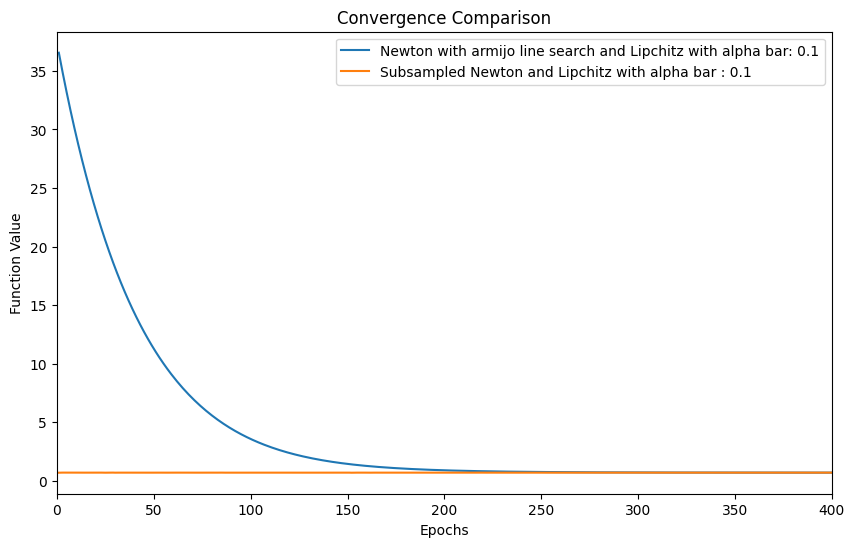

Alpha bar: 0.01
Step size choice a (Newton): 0.0011955107098495972
NB epochs with step size choice a: 400
NB epochs with step size choice b(Subsampled): 400



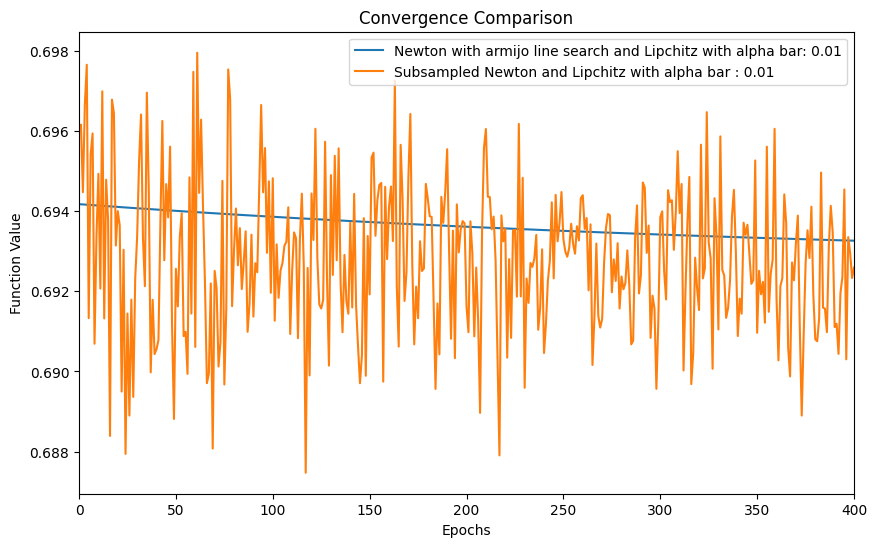

Alpha bar: 0.001
Step size choice a (Newton): 0.00011955107098495971
NB epochs with step size choice a: 400
NB epochs with step size choice b(Subsampled): 400



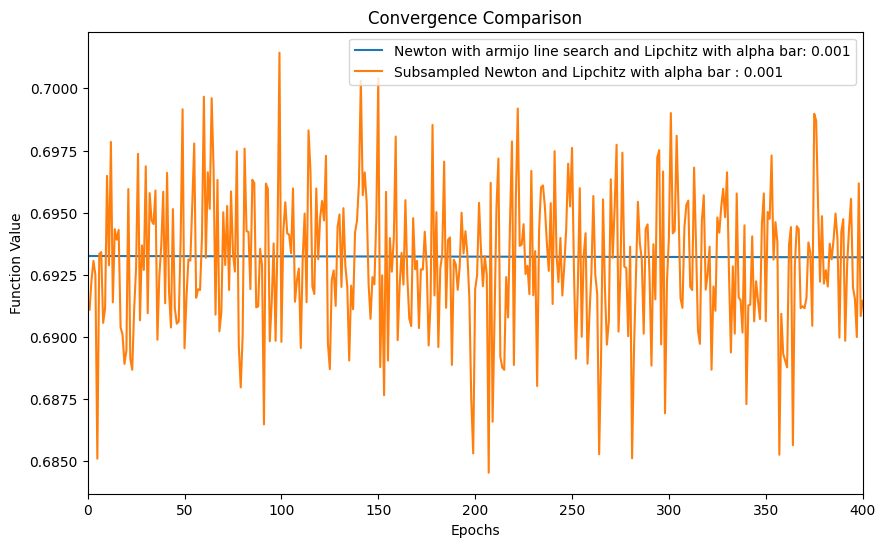

In [40]:
Sk_size_b=100
SHk_size_b=100
w0 = np.array([10, 5.0, -1.2])
alpha_bar_values = [0.1, 0.01, 0.001]

num_epochs = 400
for alpha_bar in alpha_bar_values:
    print(f"Alpha bar: {alpha_bar}")
    Lipschitz_const_a = lipschitz_constant_a(X, lam, n)
    step_size_a = step_size_choice_a(alpha_bar, Lipschitz_const_a)
    print(f"Step size choice a (Newton): {step_size_a}")
    w_a, iter_a,function_values_n = newton_method_armijo_base_epochs(w0, X, y, lam, c, theta, num_epochs, stepsize=step_size_a)
    print(f"NB epochs with step size choice a: {iter_a}")

    w_subsampling_b, epochs_b,function_values_lip = subsampling_newton_lip_epochs(w0, subsampled_loss, subsampled_gradient, subsampled_hessian, X, y, lam,Sk_size_b, SHk_size_b,num_epochs, alpha=alpha_bar, theta=theta, c=c)
    print(f"NB epochs with step size choice b(Subsampled): {epochs_b}")
    print("")

    plt.figure(figsize=(10, 6))
    it_range_a = list(range(1, iter_a + 1))
    it_range_b = list(range(1, epochs_b +1))

    plt.plot(it_range_a, function_values_n, label=f"Newton with armijo line search and Lipchitz with alpha bar: {alpha_bar}")
    plt.plot(it_range_b, function_values_lip, label=f"Subsampled Newton and Lipchitz with alpha bar : {alpha_bar}")
    plt.xlabel("Epochs")
    plt.ylabel("Function Value")
    plt.legend()
    plt.title("Convergence Comparison")
    plt.xlim(0, 400)
    plt.show()


We fixed the number of epochs to 400.
For Alpha bar: 0.1, the newton method with the stepsizea a, converges smoothly and decreasingly toward the solution, while the subsampled method with the stepsize b oscilates toward the solution.
For both alpha bar: 0.01 and 0.001, the subsampled method with the stepsize b oscilaltes while newton stagnate.






**2.2 Stochastic quasi-Newton methods**

Implementation 2.2 Implement stochastic variants of BFGS and L-BFGS using the modified Armijo line
search described in Definition 2.1, with the following requirements:
• Both methods should take |Sk| as an input;
• The same stepsize strategies than in Implementation 2.1 should be included.

In [41]:
def bfgs_quasi_newton_epochs_subsampled(w0, f, gradient_f, X, y, lam, Sk_size, num_epochs, theta, c, alpha=None):
    w = w0
    H = np.eye(len(w0))
    iter_count = 0
    epoch_count = 0
    n = len(y)
    function_values=[]
    while epoch_count < num_epochs:
        iter_count = 0
        while (iter_count * Sk_size) < n:
            Sk = np.random.choice(n, Sk_size, replace=False)
            gradient_sub = subsampled_gradient(w, X, y, lam, Sk)
            d = -np.linalg.inv(H).dot(gradient_sub)
            if alpha is None:
              alpha = subsampling_armijo_line_search(lambda w, Sk: f(w, X, y, lam, Sk),lambda w, Sk: gradient_f(w, X, y, lam, Sk),w, d,c, theta, Sk)
            else:
              alpha=alpha
            w_new = w + alpha * d
            gradient_new = gradient_f(w_new, X, y, lam, Sk)
            s = w_new - w
            v = gradient_new - gradient_sub
            rho = 1 / np.dot(v.T, s)
            if rho > 0:
                H = np.dot((np.eye(len(w)) - rho * np.outer(s, v)), np.dot(H, np.eye(len(w)) - rho * np.outer(v, s))) + rho * np.outer(s, s)
            w = w_new
            iter_count += 1
            if np.linalg.norm(gradient_new) < 1e-6:
                break
            if iter_count >= len(w0):
                break
        epoch_count += 1
        function_values.append(f(w, X, y, lam, Sk))

    return w,iter_count,epoch_count,function_values

In [42]:
#LBFGS SUBSAMPLED
def L_bfgs_quasi_newton_epochs_subsampled(w0, f, gradient_f, X, y, lam, Sk_size, num_epochs, theta, c,m, alpha=None):
    w = w0
    H = np.eye(len(w0))
    epoch_count = 0
    iter_count = 0
    s_hist = []
    v_hist = []
    function_values =[]
    while epoch_count < num_epochs:

        iter_count = 0
        while (iter_count * Sk_size) < n:

            Sk = np.random.choice(n, Sk_size, replace=False)
            gradient_sub = subsampled_gradient(w, X, y, lam, Sk)
            d = -np.linalg.inv(H).dot(gradient_sub)

            if alpha is None:
                  alpha = subsampling_armijo_line_search(lambda w, Sk: f(w, X, y, lam, Sk),lambda w, Sk: gradient_f(w, X, y, lam, Sk),w, d,c, theta, Sk)
            else:
                  alpha=alpha

            w_new = w + alpha * d


            s = alpha  * d
            v = subsampled_gradient(w_new, X, y, lam, Sk) - gradient_sub
            s_hist.append(s)
            v_hist.append(v)

            if len(s_hist) > m:
                s_hist.pop(0)
                v_hist.pop(0)

            q = gradient_sub
            alp = np.zeros(len(s_hist))
            for i in range(len(s_hist) - 1, -1, -1):
                alp[i] = np.dot(s_hist[i], q) / np.dot(v_hist[i], s_hist[i])
                q -= alp[i] * v_hist[i]
            r = np.dot(H, q)
            for i in range(len(s_hist)):
                beta = np.dot(v_hist[i], r) / np.dot(v_hist[i], s_hist[i])
                r += (alp[i] - beta) * s_hist[i]
            direction = -r

            for i in range(len(s_hist)):
                ro = 1 / np.dot(v_hist[i], s_hist[i])
                A = np.eye(len(s_hist[i])) - ro * np.outer(s_hist[i], v_hist[i])
                B = np.eye(len(s_hist[i])) - ro * np.outer(v_hist[i], s_hist[i])
                H = np.dot(A, np.dot(H, B)) + ro * np.outer(s_hist[i], s_hist[i])
            if np.linalg.norm(w_new - w) < 1e-6:
                break

            w = w_new

            iter_count += 1

        epoch_count+=1
        function_values.append(f(w, X, y, lam, Sk))

    return w,iter_count,epoch_count,function_values


Question 9 Using the same (synthetic) dataset for logistic regression than in Question 7, compare the stochastic
BFGS and L-BFGS methods with their counterparts from Section 1, using the appropriate Armijo line-search
technique for each method and a fixed epoch budget. Use different values for the sample size |Sk|, including
|Sk| = 1.

For batch size Sk: 1
Nb of epochs for subsampled bgfs  = 700
Nb of epochs for subsampled L-bgfs  = 700
W final value bgfs = [ 38.35921827   0.15939473 -66.98546897]
W final value L-bgfs = [ 0.03592004 -0.00517744  0.00767484]



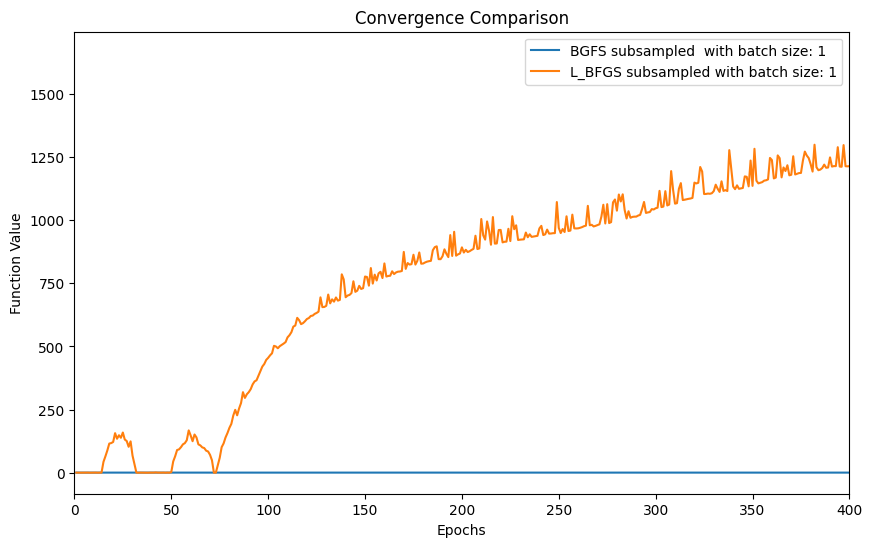

For batch size Sk: 100
Nb of epochs for subsampled bgfs  = 700
Nb of epochs for subsampled L-bgfs  = 700
W final value bgfs = [0.09441706 0.04986757 0.03647397]
W final value L-bgfs = [ 0.03844954 -0.00952092  0.01182347]



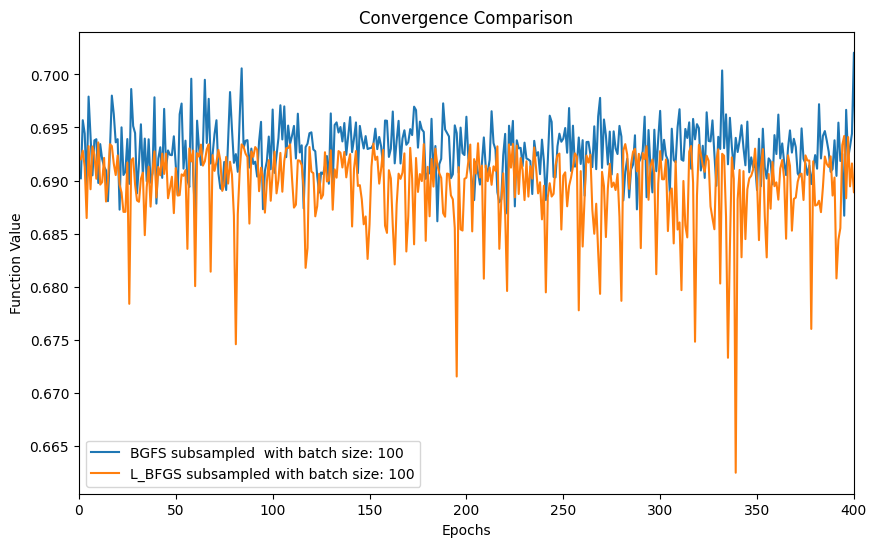

For batch size Sk: 1000
Nb of epochs for subsampled bgfs  = 700
Nb of epochs for subsampled L-bgfs  = 700
W final value bgfs = [ 0.03102059 -0.01269765  0.01440635]
W final value L-bgfs = [ 0.05134784 -0.00507327  0.0073151 ]



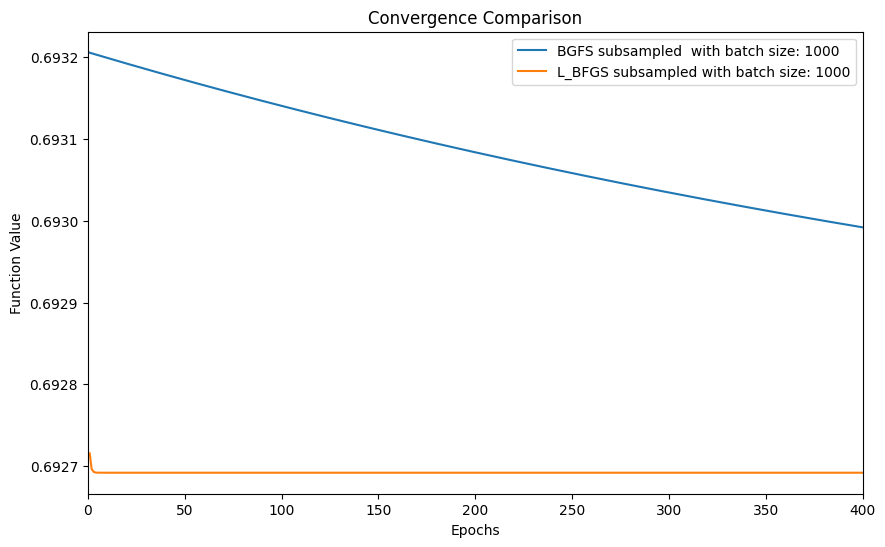

In [43]:
#Comparaison of BFGS and LBFGS subsampled for different batch sizes with BFGS and LBGS
#fixed size of epochs
num_epochs=700
m=5
Sk_sizes=[1,100,1000]
for Sk_size in Sk_sizes:
  print(f"For batch size Sk: {Sk_size}")
  w_final_bgfs, num_iterations_bgfs,epoch_count_bgfs,function_values_bfgs= bfgs_quasi_newton_epochs_subsampled(w0, subsampled_loss,subsampled_gradient,X, y, lam,Sk_size,num_epochs ,theta=theta, c=c, alpha=alpha_bar)
  w_final_l_bgfs,num_iterations_l_bgfs,epoch_count_l_bgfs,function_values_lbfgs= L_bfgs_quasi_newton_epochs_subsampled(w0, subsampled_loss,subsampled_gradient,X, y, lam,Sk_size,num_epochs ,theta,c,m,None)
  print("Nb of epochs for subsampled bgfs  =", epoch_count_bgfs)
  print("Nb of epochs for subsampled L-bgfs  =", epoch_count_l_bgfs)
  print("W final value bgfs =", w_final_l_bgfs)
  print("W final value L-bgfs =", w_final_bgfs)
  print("")
  plt.figure(figsize=(10, 6))
  it_range_bfgs = list(range(1, epoch_count_bgfs + 1))
  it_range_lbfgs = list(range(1, epoch_count_l_bgfs +1))
  plt.plot(it_range_bfgs, function_values_bfgs, label=f"BGFS subsampled  with batch size: {Sk_size}")
  plt.plot(it_range_lbfgs, function_values_lbfgs, label=f"L_BFGS subsampled with batch size: {Sk_size}")
  plt.xlabel("Epochs")
  plt.ylabel("Function Value")
  plt.legend()
  plt.title("Convergence Comparison")
  plt.xlim(0, 400)
  plt.show()

For the subsampled versions :
For batch size 1: LBFGS diverges at first meanwhile BFGS gets closer from the start to the solution. However, after around a very big number of epochs, it starts reaching the optimal solution more quickly LBFGS then BFGS.

For batch size 100: It appears to oscillate more with LBFGS compared to BFGS. However, both methods still get fairly close to the solution, and the performance of the two methods remains quite similar.

For batch size 1000: LBFGS converges much faster towards the optimum without oscillating as much. Therefore, we can conclude that LBFGS performs better than BFGS in the subsampled version.

Comparing BFGS with its subsampled version :
For BFGS, the subsampled version takes significantly longer to converge compared to the base version.

Comparing LBFGS with its subsampled version : For LBFGS, adding subsampling significantly increases the number of epochs required. With small batch sizes, this combination initiates convergence difficulties initially but improves over iterations. However, for larger batch sizes, it converges much slower than the non-subsampled version.

# 3.2 Optimization problem

3.1 Dataset

Implementation 3.1 Select a dataset from the libsvm repository. The dataset should have at least 20 features
and 1,000 training samples.

In [44]:
from sklearn.datasets import load_svmlight_file
import urllib.request
import os
def load_dataset(file_url):
    urllib.request.urlretrieve(file_url, "dataset_file")
    X, y = load_svmlight_file("dataset_file")
    os.remove("dataset_file")
    return X.toarray(), y

X, y = load_dataset("https://www.csie.ntu.edu.tw/%7Ecjlin/libsvmtools/datasets/binary/phishing")

print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)
print("Exemple de données X:", X[0])
print("Exemple de label y:", y[0])


Dimensions de X: (11055, 68)
Dimensions de y: (11055,)
Exemple de données X: [0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257
 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257
 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257 0.18257
 0.18257 0.18257 0.18257 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.     ]
Exemple de label y: 0.0


3.2 Optimization problem

Implementation 3.2 Given your dataset, implement the associated codes for gS, ∇gS and ∇2gS, where S
is a set of random indices in {1, . . . , n}.

In [45]:
import numpy as np

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def gi(w, xi, yi):
    z = np.dot(xi, w)
    diff = yi - sigmoid(z)
    return diff * diff

def grad_gi(w, xi, yi):
    z = np.dot(xi, w)
    exp_z = np.exp(z)
    sigmoid_z = sigmoid(z)
    return -2 * exp_z * ((exp_z * (yi - 1) + yi) / (1 + exp_z) ** 3) * xi

def hess_gi(w, xi, yi):
    z = np.dot(xi, w)
    exp_z = np.exp(z)
    term = (2 * exp_z * np.exp(2 * z) * (yi - 1) + 2 * exp_z - yi) / ((1 + exp_z) ** 4)
    return term * np.outer(xi, xi)

def gS(w, X, y, S):
    n = len(S)
    return sum(gi(w, X[i], y[i]) for i in S) / n

def grad_gS(w, X, y, S):
    return np.mean([grad_gi(w, X[i], y[i]) for i in S], axis=0)

def hess_gS(w, X,y,S):
    return np.mean([hess_gi(w, X[i],y[i]) for i in S], axis=0)

3.3 Comparison of the algorithms

Question 10 Compare the performance of the subsampling Newton method from Section 2.1 and that of the
stochastic quasi-Newton method of Section 2.2 with a (batch) stochastic gradient approach. You may reuse
the stochastic gradient implementation from the course notebooks.



In [46]:
Sk_size=100
SHk_size=100
w0 = np.random.rand(68)

In [47]:
def subsampling_newton_new(w0, f, gradient_f, hessian_f, X, y, lam, Sk_size, SHk_size,num_epochs,alpha=None, s=None, theta=None, c=None):
    w = w0
    iteration = 0
    epoch_count = 0
    n = len(y)  # Taille de l'ensemble de données

    while epoch_count < num_epochs:
        iteration = 0
        while (iteration * Sk_size) < n:
          Sk = np.random.choice(n, Sk_size, replace=False)
          SHk = np.random.choice(n, SHk_size, replace=False)
          gradient_sub = gradient_f(w, X, y,Sk)
          hessian_sub = hessian_f(w, X,y,SHk)
          d = -np.linalg.solve(hessian_sub, gradient_sub)

          if alpha is None:
            alpha = subsampling_armijo_line_search(lambda w, Sk: f(w, X, y,Sk),
                                                      lambda w, Sk: gradient_f(w, X, y,Sk),w, d,c, theta, Sk)
          else:
            alpha= alpha

          w = w + alpha * d
          iteration += 1

          if np.linalg.norm(gradient_sub) < 1e-6:
              break
        epoch_count += 1
        print(epoch_count)

    return w, epoch_count

def subsampling_armijo_line_search(f, grad_f, w, p, c, theta, S_k):
    alpha = 1.0
    while f(w + alpha * p, S_k) > f(w, S_k) + c * alpha * np.dot(grad_f(w, S_k), p):
        alpha *= theta
    return alpha

In [48]:
#stochastic quasi-Newton with batch gradient approach
import numpy as np
from scipy.linalg import toeplitz

def subsampling_quasi_newton(w0, f, gradient_f, hessian_f, X, y, lam, Sk_size, SHk_size,num_epochs,alpha=None, s=None, theta=None, c=None,max_iterations=10000):
    w = w0
    iteration = 0
    epoch_count = 0
    n = len(y)
    while epoch_count < num_epochs:
        iteration = 0
        while (iteration * Sk_size) < n:
          Sk = np.random.choice(n, Sk_size, replace=False)
          SHk = np.random.choice(n, SHk_size, replace=False)
          gradient_sub = grad_gS(w, X, y,Sk)
          hessian_sub = hess_gS(w, X,y,SHk)
          lamda_min = np.min(np.linalg.eigvalsh(hess_gS(w,X,y,SHk)))
          lamda = float(2 * max(-lamda_min, 1e-10))
          d = newton_direction_new(w, lamda, f, grad_gS, hess_gS,SHk,Sk)

          if alpha is None:
            alpha = subsampling_armijo_line_search(lambda w, Sk: gS(w, X, y,Sk),
                                                      lambda w, Sk: grad_gS(w, X, y,Sk),w, d,c, theta, Sk)
          else:
            alpha= alpha
          w = w + alpha * d
          iteration += 1
          if np.linalg.norm(gradient_sub) < 1e-6:
              break
        epoch_count+=1
    return w,epoch_count

def subsampling_armijo_line_search(f, grad_f, w, p, c, theta, S_k):
    alpha = 1.0
    while f(w + alpha * p, S_k) > f(w, S_k) + c * alpha * np.dot(grad_f(w, S_k), p):
        alpha *= theta
    return alpha

def newton_direction_new(w, lamda,f,d_f,dd_f,SHk,Sk):
    H = dd_f(w,X,y,SHk)
    H += lamda * np.eye(len(w), dtype=float)
    H_inv = np.linalg.inv(H)
    gradient = d_f(w,X,y,Sk)
    direction = -np.dot(H_inv, gradient)
    return direction